In [1]:
%load_ext autoreload
%autoreload 2
import sys
import os
import pandas as pd
import numpy as np 
from pathlib import Path
from hypnose_analysis.utils.movement_analysis_utils import *
from hypnose_analysis.utils.visualization_utils import print_cache_keys
from ipywidgets import widgets
from IPython.display import display
%matplotlib widget

## Plot movement traces for different modes - plot_trial_trace_by_mode quick guide

- Common args: subjid, dates (list [] or range ()), xlim, ylim, smooth_window (frames), linewidth, alpha, invert_y
- Modes: 
    - rewarded: rewarded trials only
    - rewarded_hr: rewarded trials; HR trials colored with HR palette
    - completed: all completed trials (rewarded, unrewarded, timeout)
    - all_trials: completed and aborted trials
    - fa_by_response: FA trials (selected by fa_types filter), sorted by response port
    - fa_by_odor: FA trials, sorted by each aborted odor
    - hr_only: hidden-rule trials, colored by associated reward port, with rewarded and unrewarded trials
- Options: 
    - show_average: adds mean trace + SEM per category
    - highlight_hr: in rewarded/all_trials mode, recolor HR trials in different palette
    - color_by_index: ignore categories; color each trace by normalized sample index
    - fa_types: filter FA labels (select between "FA_time_in", "FA_time_out", or both)

Loaded SLEAP tracking: 146922 frames from sub-040_ses-20251231_combined_sleap_tracking_timestamps.csv


[<Figure size 1000x600 with 1 Axes>,
 <Figure size 1000x600 with 1 Axes>,
 <Figure size 1000x600 with 1 Axes>]

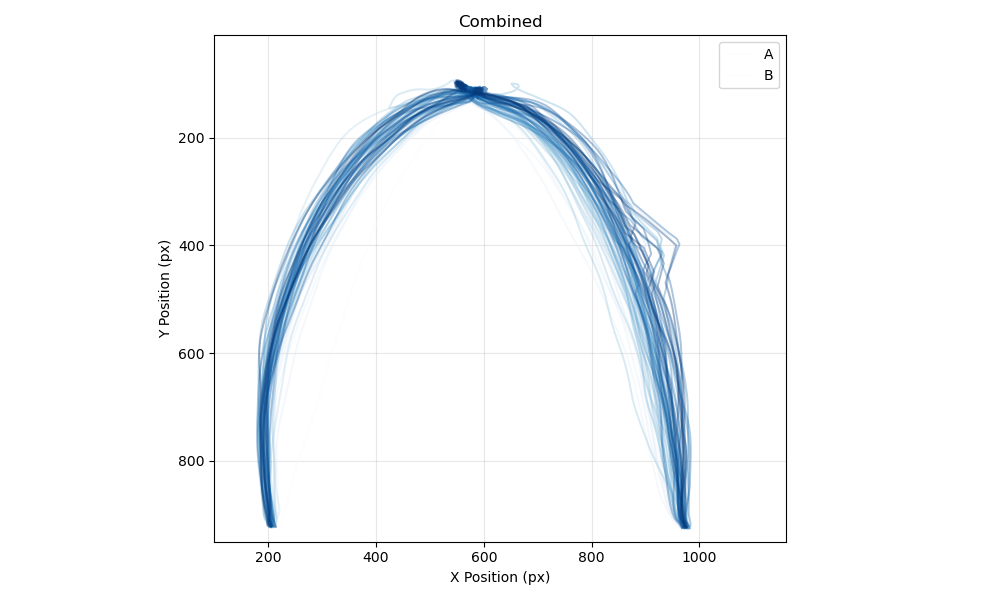

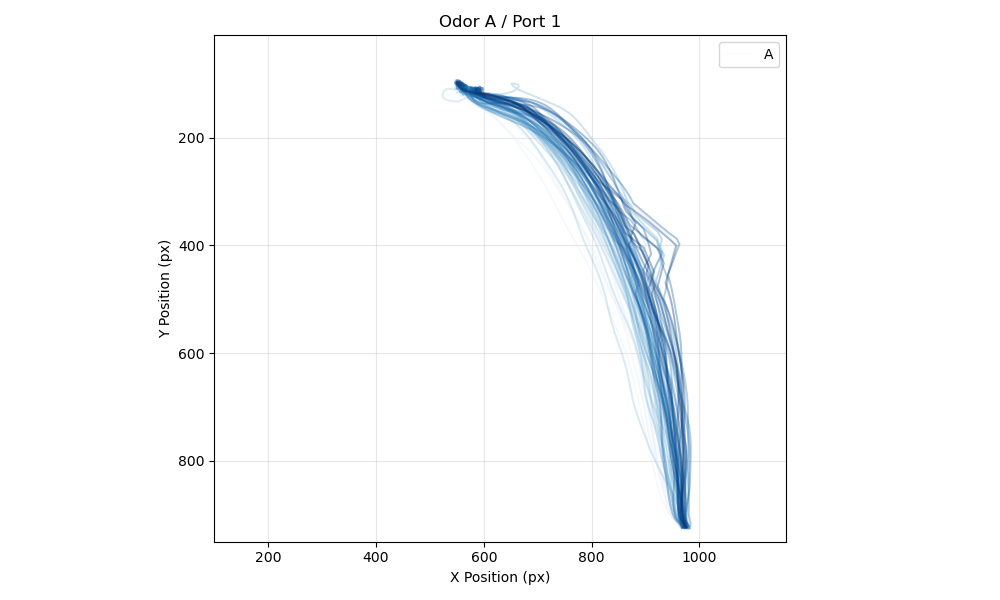

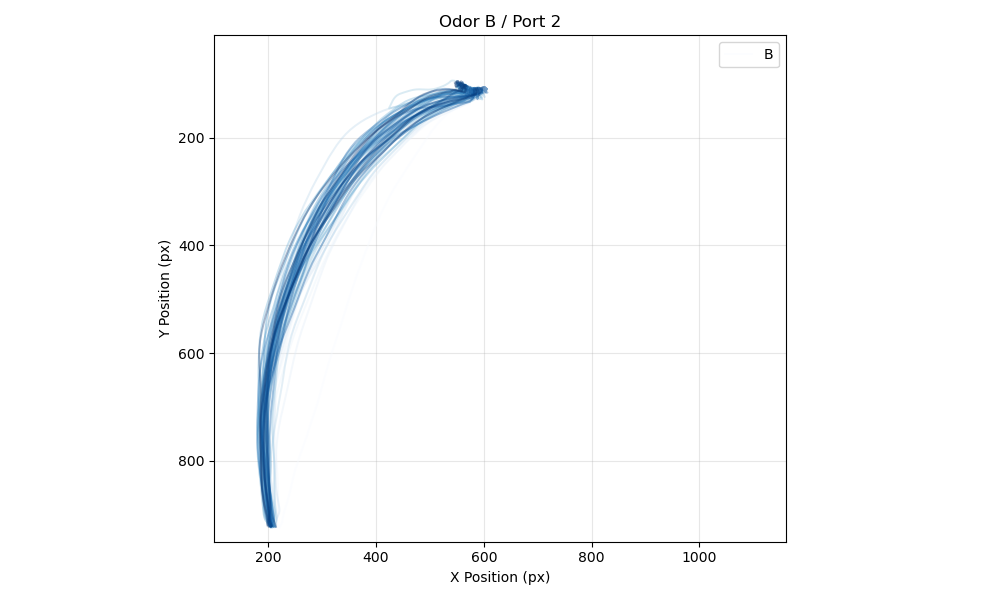

In [2]:
plot_trial_traces_by_mode(
    subjid=40,
    dates=[20251231],
    mode='rewarded',
    xlim=(100,1160),
    ylim=(10,950),
    show_average=False, 
    highlight_hr=True, 
    color_by_index=False,
    color_by_speed=False,
    color_by_trial_id=True,
    fa_types=['FA_time_in'],
    figsize=(10,6)
)

# Modes: 
    # rewarded, rewarded_hr, completed, all_trials, fa_by_response, fa_by_odor, hr_only

# Speed Analysis

In [12]:
speed_analysis = run_speed_analysis_batch(
    subjids=[40],
    dates=[20251128],
    fa_label_filter=["fa_time_in", "fa_time_out"],
    threshold=True
)

Loaded SLEAP tracking: 479565 frames from sub-040_ses-20251128_combined_sleap_tracking_timestamps.csv
[run_speed_analysis_batch] Completed speed analysis for:
  sub-040: 20251128


C:\Users\HarrisLab\Desktop\Repos\hypnose\hypnose-analysis\src\hypnose_analysis\utils\movement_analysis_utils.py:2364: RuntimeWarning: Mean of empty slice
  session_mean = np.nanmean(stack, axis=0)


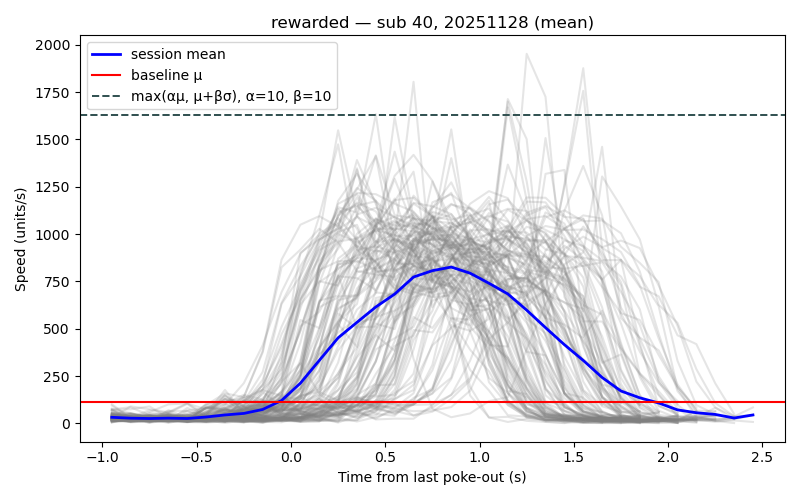

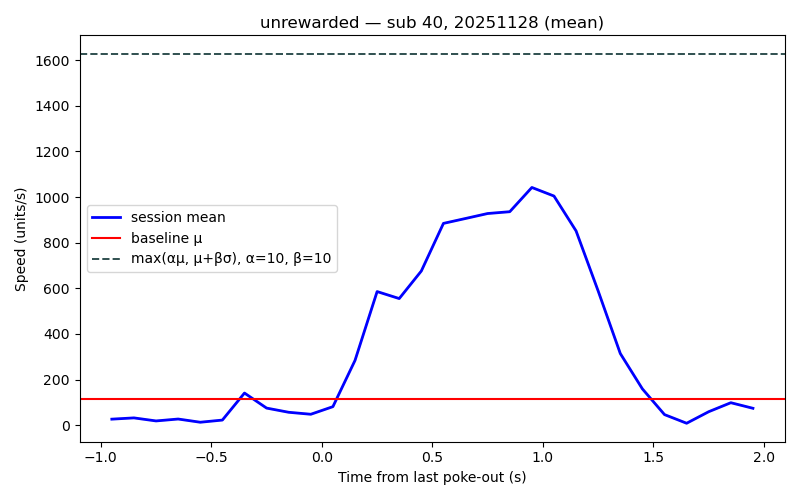

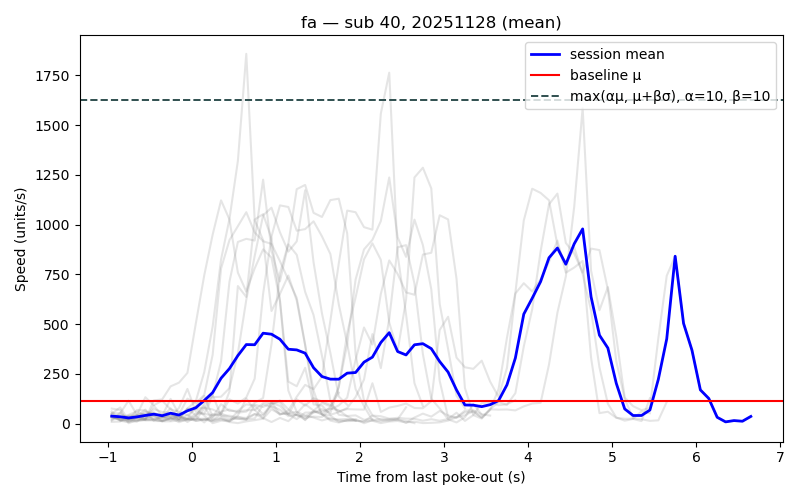

In [11]:
speed_analysis_plot = plot_epoch_speeds_by_condition(
    subjid=40,
    dates=[20251128],
    fa_label_filter=["fa_time_in", "fa_time_out"],
)


[CACHE HIT] SLEAP session for subjid=40, date=20251211


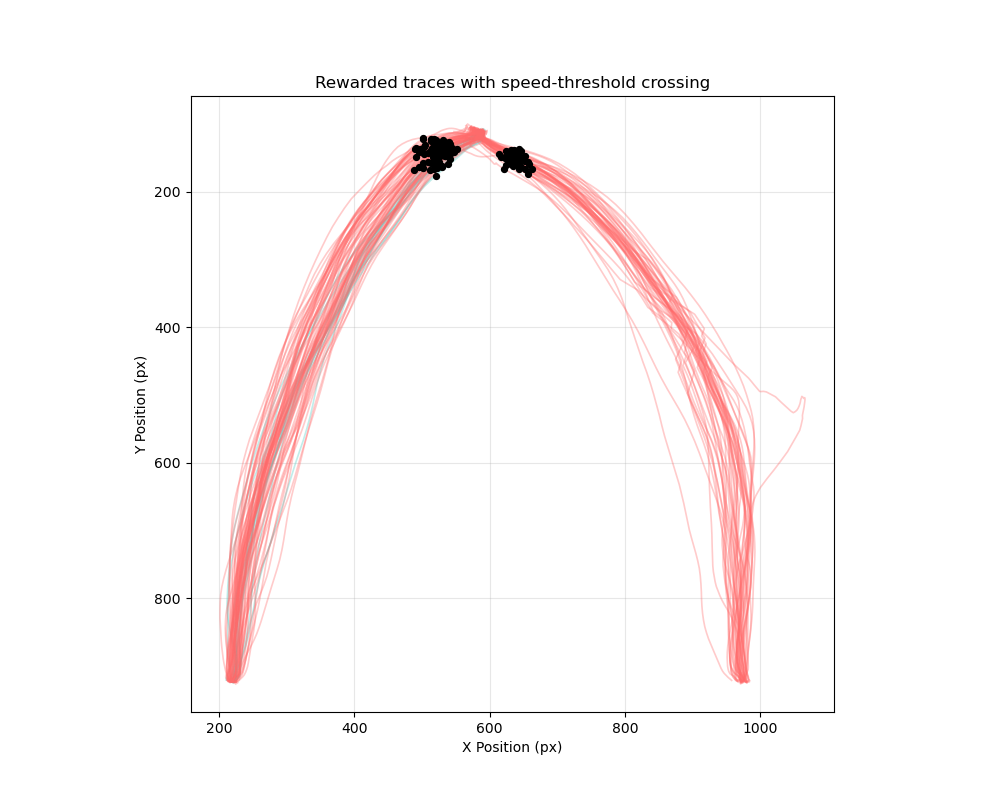

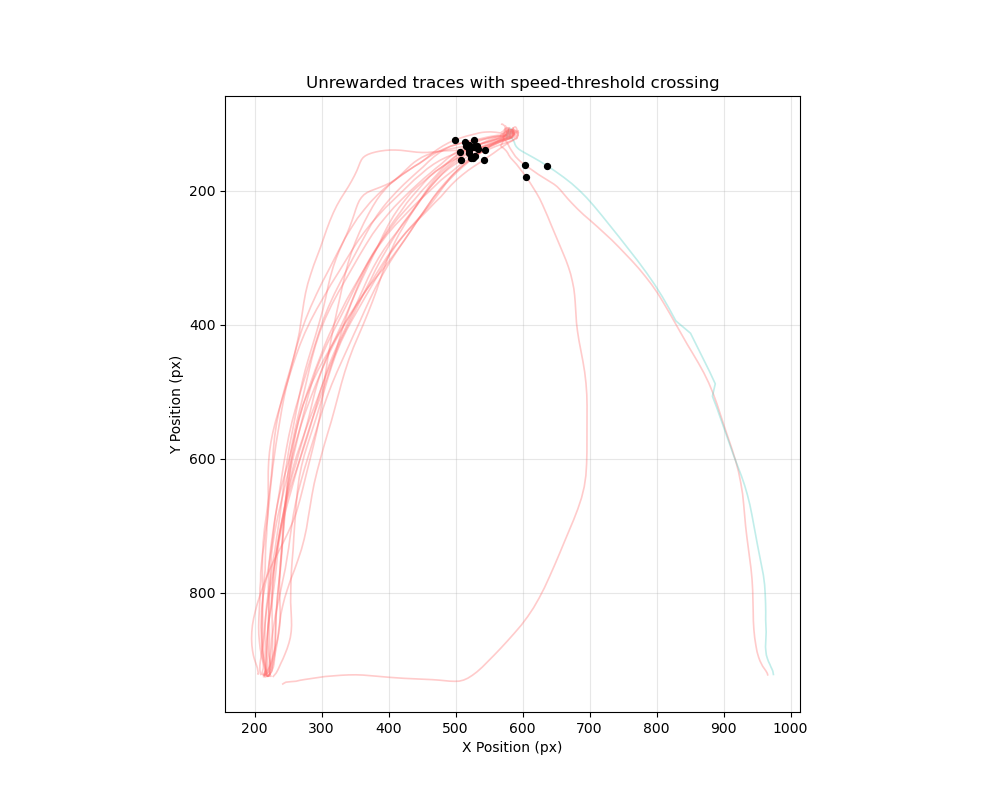

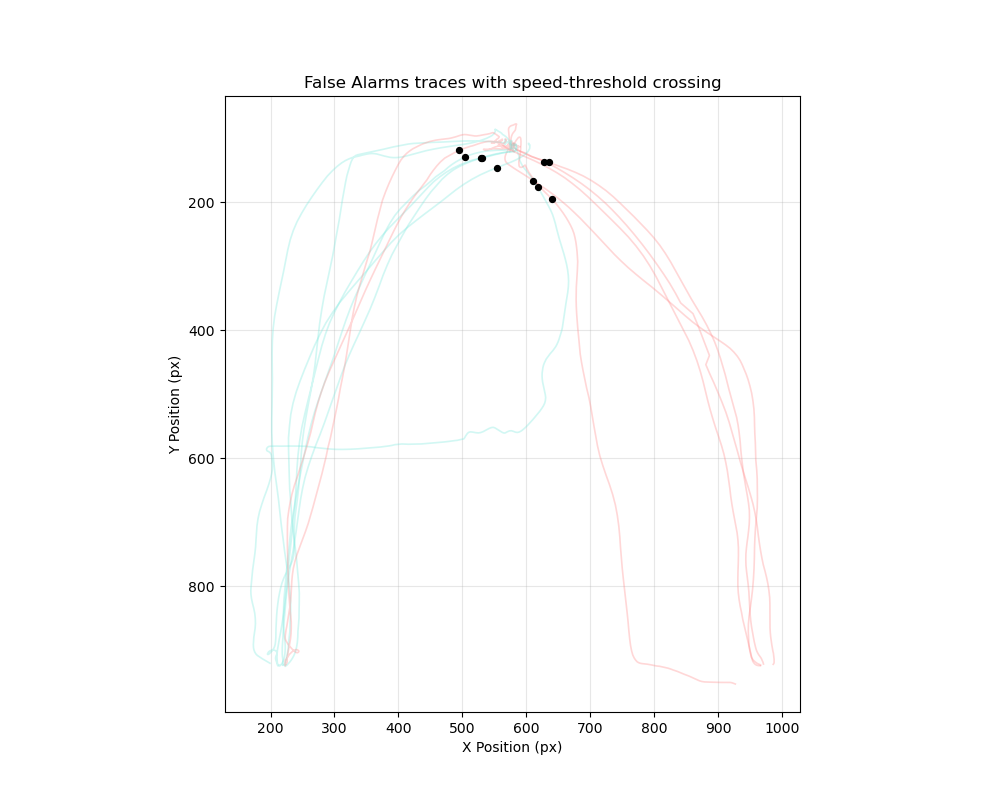

In [4]:
fig_thresh = plot_traces_with_speed_threshold(
    subjid=40,
    dates=[20251211],
    fa_types=["FA_time_in"],
    pre_buffer_s=0.5,
    threshold_alpha=10.0,
    threshold_beta=10.0,
    smooth_window=5,
    invert_y=True, 
)

[CACHE HIT] SLEAP session for subjid=40, date=20251211


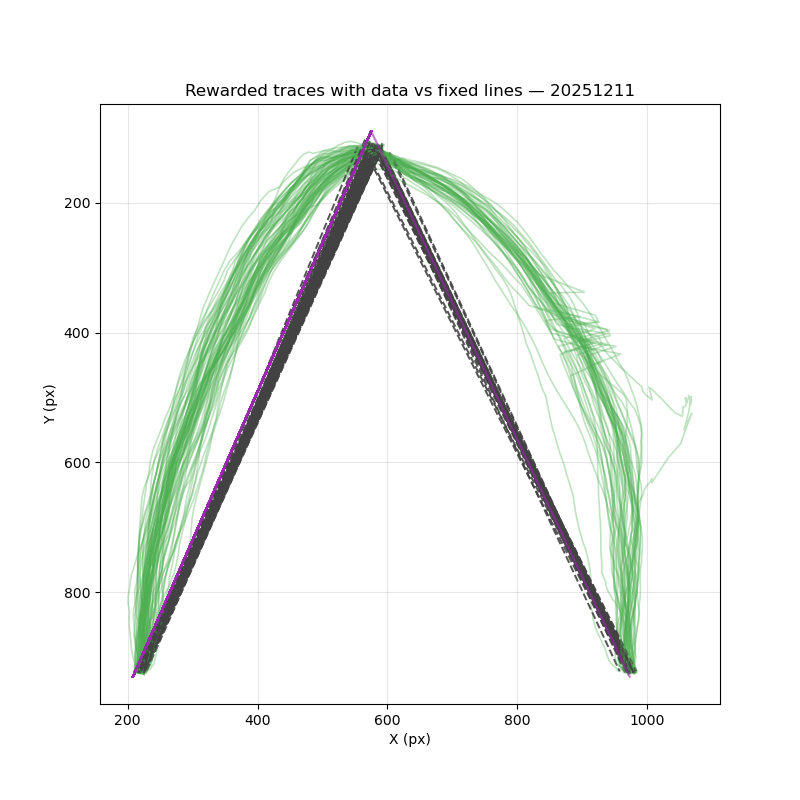

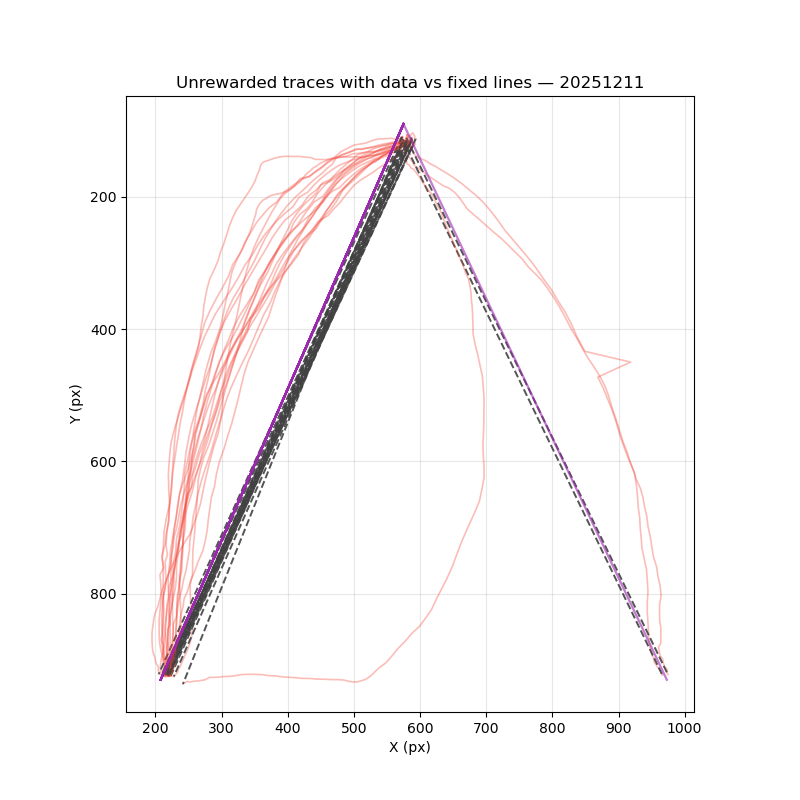

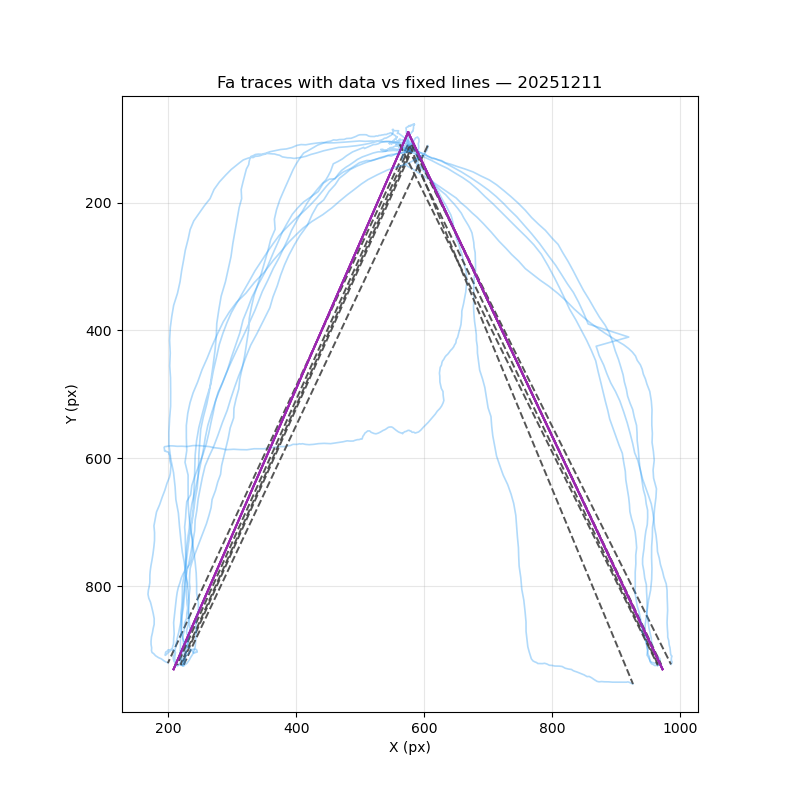

In [7]:
figs_overlay = plot_tortuosity_lines_overlay(
    subjid=40,
    dates=[20251211],
    fa_types=["FA_time_in"],
    bin_ms=100,
    fixed_start_xy=(575, 90),
    fixed_goal_a_xy=(208, 930),
    fixed_goal_b_xy=(973, 930),
)


STATISTICAL SUMMARY (Kruskal-Wallis + Pairwise Mann-Whitney U with Holm-Bonferroni correction)

latency_s: Kruskal-Wallis: p = 0.4358
      (not significant)

movement_from_valve_s: Kruskal-Wallis: p = 0.2972
      (not significant)

path_length_px: Kruskal-Wallis: p = 0.0009
      Rewarded vs Unrewarded: p = 0.4674 (corrected)
      Rewarded vs Fa: p = 0.0005 (corrected)
      Unrewarded vs Fa: p = 0.0165 (corrected)

travel_time_s: Kruskal-Wallis: p = 0.0308
      Rewarded vs Unrewarded: p = 0.0631 (corrected)
      Rewarded vs Fa: p = 0.2729 (corrected)
      Unrewarded vs Fa: p = 0.0729 (corrected)

tortuosity: Kruskal-Wallis: p = 0.0008
      Rewarded vs Unrewarded: p = 0.5185 (corrected)
      Rewarded vs Fa: p = 0.0004 (corrected)
      Unrewarded vs Fa: p = 0.0187 (corrected)




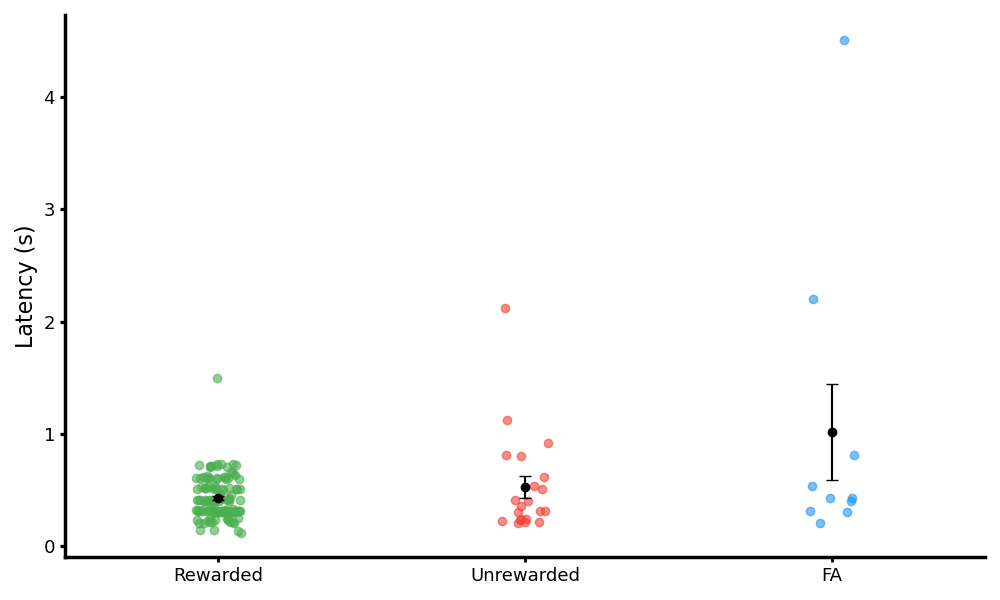

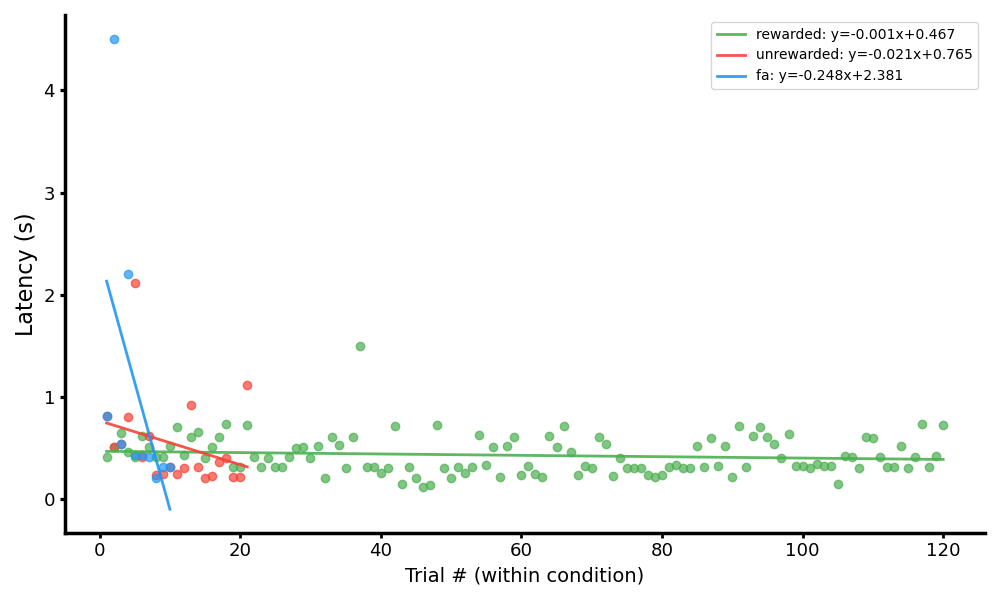

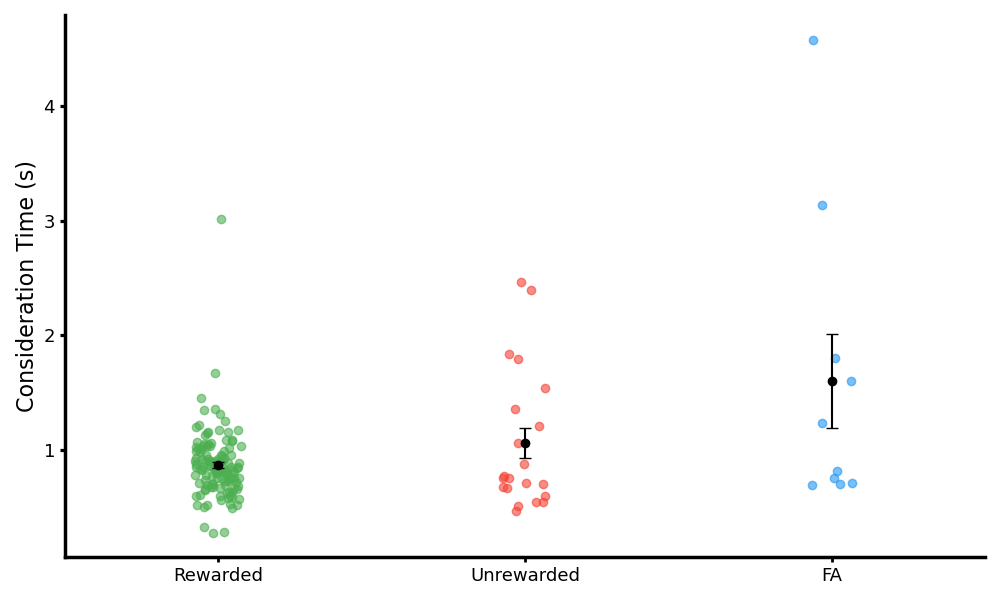

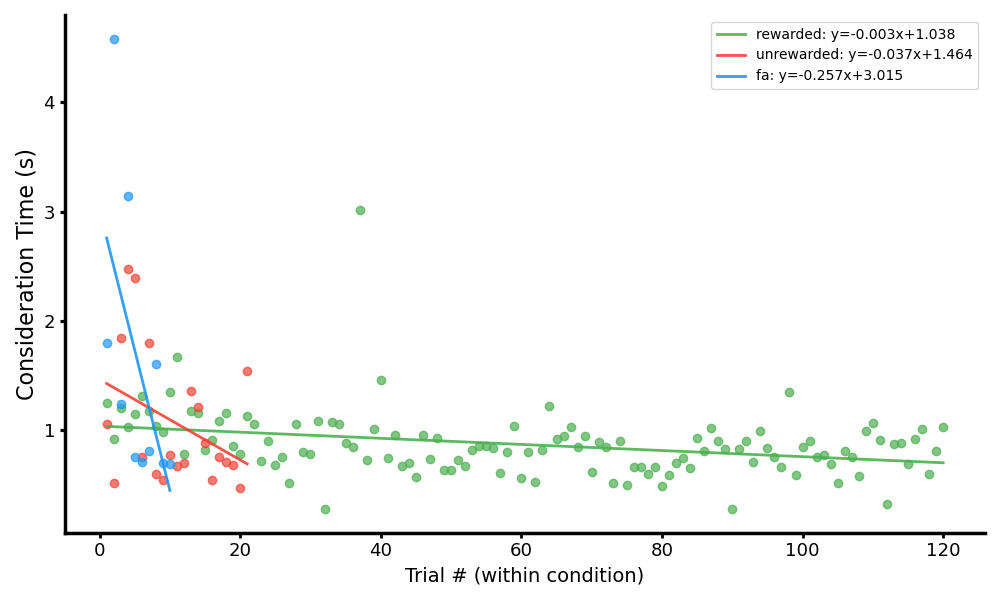

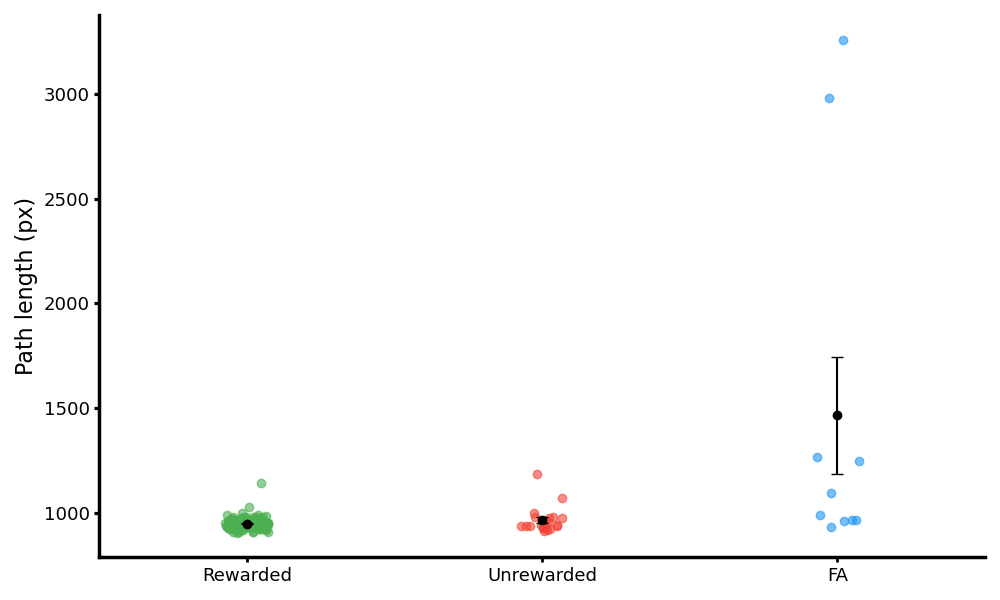

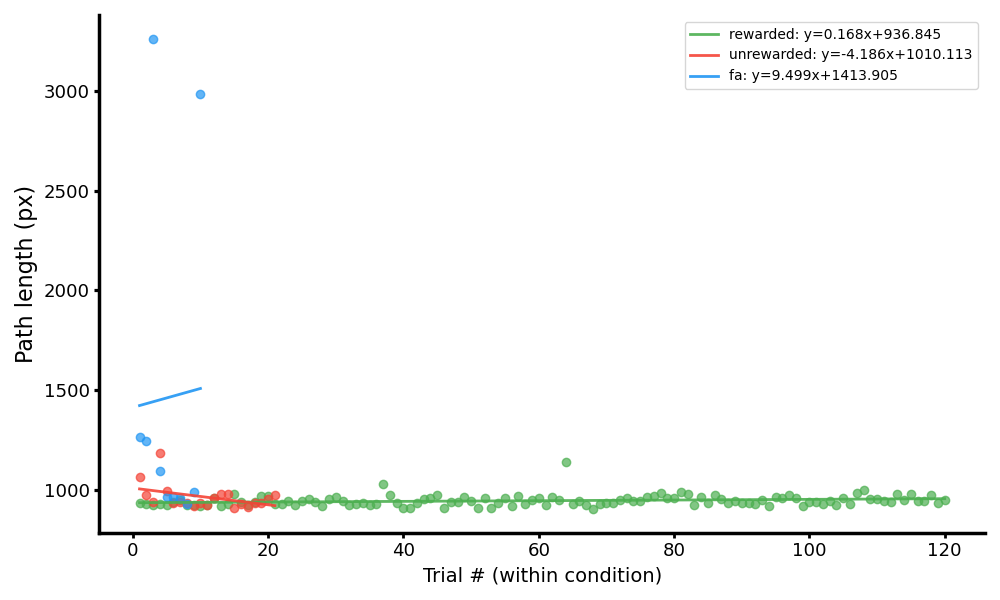

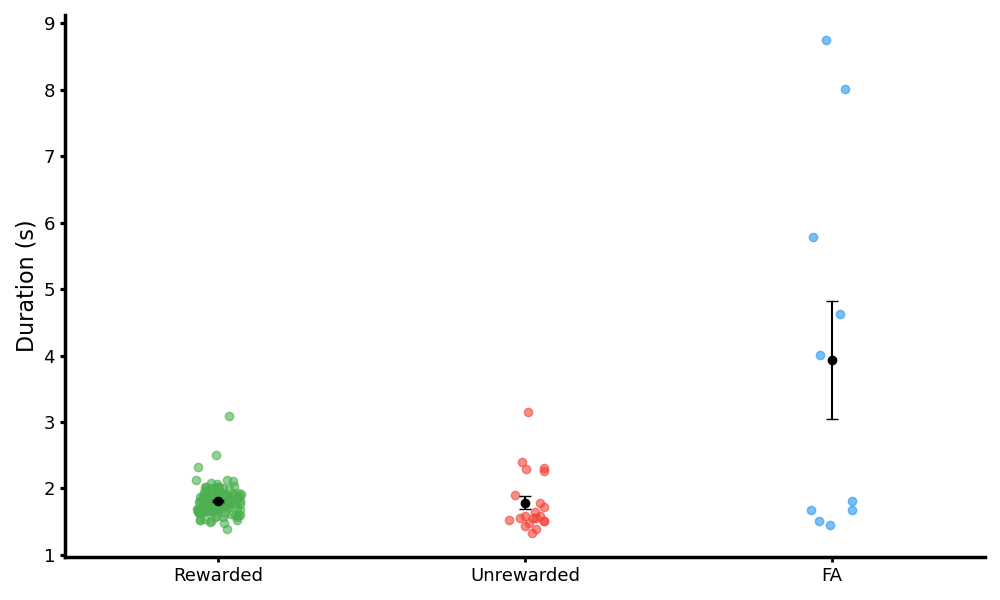

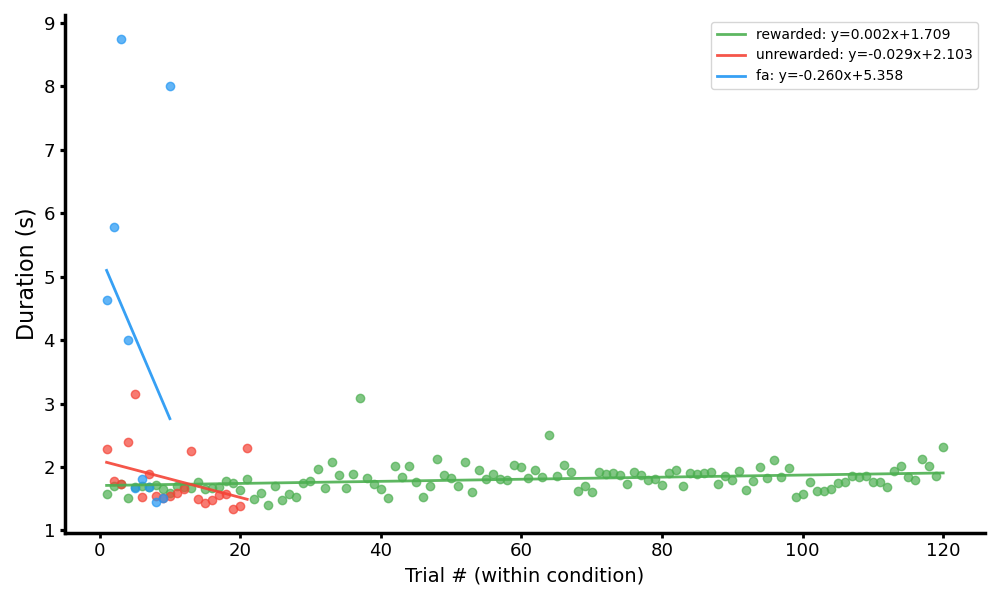

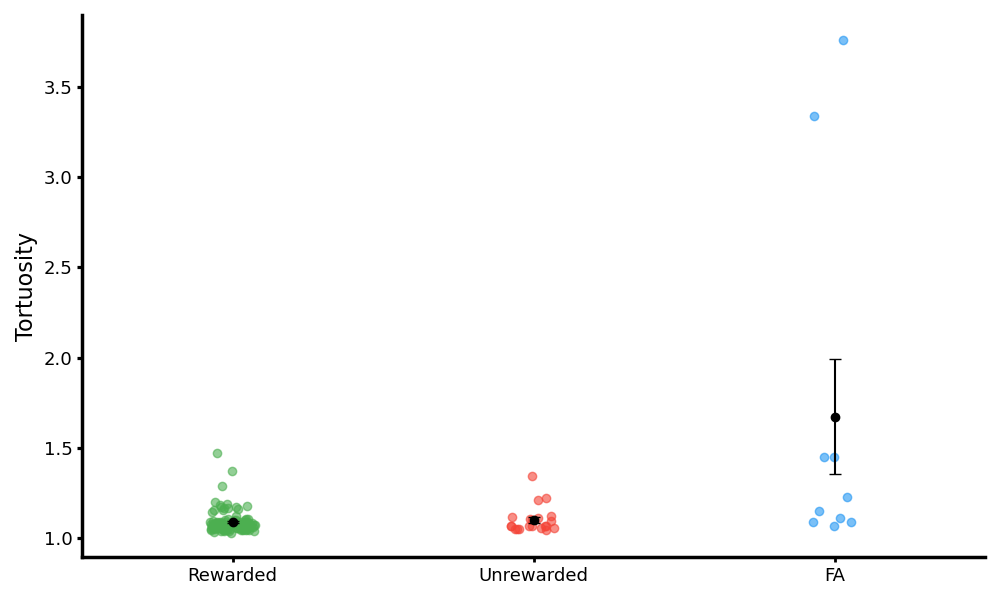

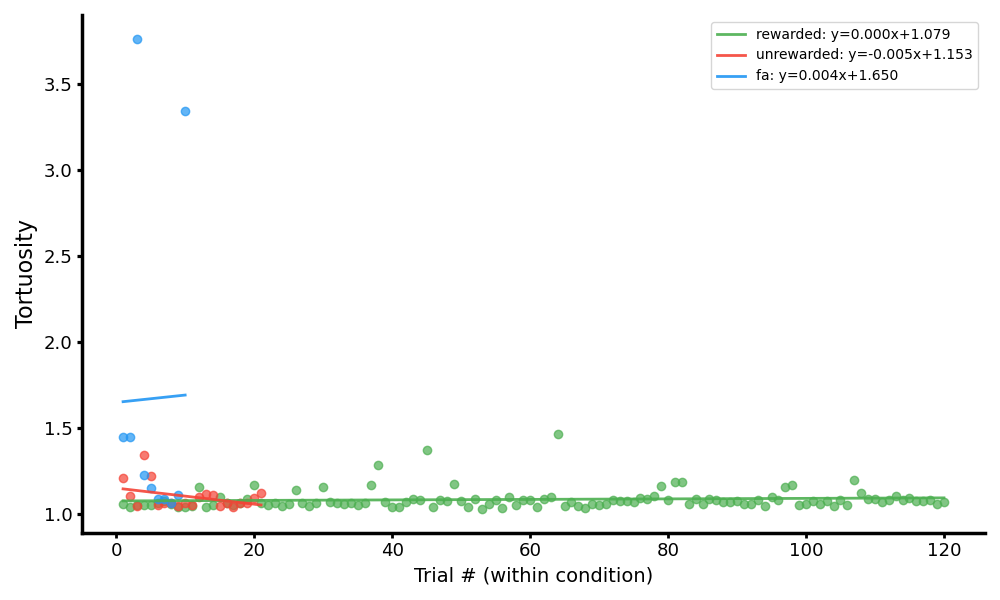

In [6]:
onset_latency = plot_movement_analysis_statistics(
    subjid=40,
    dates=[20251211],
    fa_types=["FA_time_in"],
    clean_graph=False
)

# Functionalities

In [9]:
plt.close('all')

In [2]:
print_cache_keys()

[CACHE CONTENTS] Current cache keys:


# Miscellaneous

In [ ]:
# modes can be simple (all movement), trial_state (within trial vs outside), last_odor (A vs B), trial_windows (one or more trial windows), time_windows (one or more time windows), or trial_windows_rew
# for trial_windows: trial_windows=[(0, 20), (-20, None)] will plot first vs last 20 trials
# for time_windows: time_windows=[("15:20:00","15:25:00"), ("16:00:00","16:05:00")] will plot 2 5-minute windows
plot_movement_with_behavior(40, 20251211, mode='time_windows', time_windows=[("14:42:12", "14:42:55")],trial_windows=[(0, 10), (-10,None)], xlim=(100,1160), ylim=(10,950))

In [ ]:
# Cell to check speed bins for high speeds in a time window before 0. This is for rewarded trials only. Returns trial ID of trials that have speed above threshold in the pre-zero window.

from pathlib import Path
import pandas as pd
from hypnose_analysis.paths import get_derivatives_root

# Scan speed bins for high speeds in the pre-zero window (rewarded trials only)
subjid = 40
date = 20251204
speed_threshold = 120.0
t_min, t_max = -0.3, -0.1  # seconds relative to t=0

sub_str = f"sub-{subjid:03d}"
deriv_root = get_derivatives_root()
sub_dirs = list(deriv_root.glob(f"{sub_str}_id-*"))
if not sub_dirs:
    raise FileNotFoundError(f"No subject dir for {sub_str} under {deriv_root}")
sub_dir = sub_dirs[0]

ses_dirs = list(sub_dir.glob(f"ses-*_date-{date}"))
if not ses_dirs:
    raise FileNotFoundError(f"No session dir for date {date}")
ses_dir = ses_dirs[0]

results_dir = ses_dir / "saved_analysis_results"
analysis_path = results_dir / "speed_analysis.parquet"
trial_path_parquet = results_dir / "trial_data.parquet"
trial_path_csv = results_dir / "trial_data.csv"

if not analysis_path.exists():
    raise FileNotFoundError(f"speed_analysis.parquet not found at {analysis_path}")

df = pd.read_parquet(analysis_path)

# Optional: load trial metadata to report trial_id if available
trial_df = None
if trial_path_parquet.exists():
    trial_df = pd.read_parquet(trial_path_parquet)
elif trial_path_csv.exists():
    trial_df = pd.read_csv(trial_path_csv)

# Filter to rewarded trials
if "condition" in df.columns:
    df = df[df["condition"] == "rewarded"].copy()
rewarded_indices = None
if trial_df is not None and "response_time_category" in trial_df.columns:
    rewarded_mask = (trial_df["response_time_category"].str.lower() == "rewarded") & (~trial_df.get("is_aborted", False).astype(bool))
    rewarded_indices = set(trial_df.index[rewarded_mask].tolist())
    df = df[df["trial_index"].isin(rewarded_indices)]

# Apply window and speed filters
mask_window = df["bin_mid_s"].between(t_min, t_max, inclusive="both")
mask_speed = df["speed"] > speed_threshold
suspect = df[mask_window & mask_speed].copy()

if suspect.empty:
    print("No bins exceed threshold in the requested window (rewarded trials only).")
else:
    trial_counts = suspect.groupby("trial_index").size().sort_index()
    print(f"Found {len(suspect)} bins across {trial_counts.size} rewarded trials")
    print("Trial indices:", list(trial_counts.index))
    if trial_df is not None and "trial_id" in trial_df.columns:
        id_map = trial_df["trial_id"]
        labeled = [id_map.get(idx, idx) if hasattr(id_map, "get") else idx for idx in trial_counts.index]
        print("Trial IDs:", labeled)
    display(suspect.sort_values(["trial_index", "bin_mid_s"])[["trial_index", "bin_mid_s", "speed"]].head(30))

Found 9 bins across 9 rewarded trials
Trial indices: [119, 127, 143, 154, 181, 198, 204, 215, 216]
Trial IDs: [np.int64(4), np.int64(12), np.int64(28), np.int64(39), np.int64(66), np.int64(83), np.int64(89), np.int64(100), np.int64(101)]


trial_index  bin_mid_s       speed
4707          119      -0.15  121.240722
5021          127      -0.15  128.318695
5349          143      -0.15  125.329492
5912          154      -0.15  120.667423
6854          181      -0.15  123.138169
7518          198      -0.15  146.445286
7819          204      -0.15  146.526058
8292          215      -0.15  146.262416
8328          216      -0.15  166.457088